> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
●‘Neighborhood’ indicates the location of the hospital.
●‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare



### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will
show up for their scheduled appointment?


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
# Upgrade pandas to use dataframe.explode() function. 


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [116]:
df = pd.read_csv("noshowappointments.csv")
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [118]:
df.shape

(110527, 14)







There is 110527 Rows and 14 columns in this dataset

In [119]:
df["PatientId"].nunique()

62299

There is only 62299 unique patient out of 110257

In [120]:
df.duplicated().sum()

0

There is No duplication in this dataset

In [121]:
df['PatientId'].duplicated().sum()

48228

48228 are duplicated

In [122]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#Mean Age for the patients in about 37 years 
#About 75% of the patients are between 55 years old and 37 years old
#min age is -1 which is strage and must be a mistake it should be droped
#About 50% of the patients are between 37 and 18 years old
#About 75% recieved SMS 

## Data Wrangling

In [123]:
#Deleting the negative one from the age column to make the data more clean
neg_age = df.query("Age == -1")
index = neg_age.index
df.drop(index,inplace = True)

Dropping The Negative value of age from dataset

In [124]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Now it dissappeared from the dataset

In [125]:
#droping duplicated patientId and have have the same noshow value
df.drop_duplicates(["PatientId","No-show"],inplace= True)

In [126]:
df.shape

(71816, 14)

In [127]:
#Drop unnessesary columns from the dataset
df.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"],axis=1 ,inplace=True)

In [128]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [129]:
#Changing the name of no show column
df.rename(columns={"No-show":"No_show"} , inplace=True)
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




# Overview of the dataset

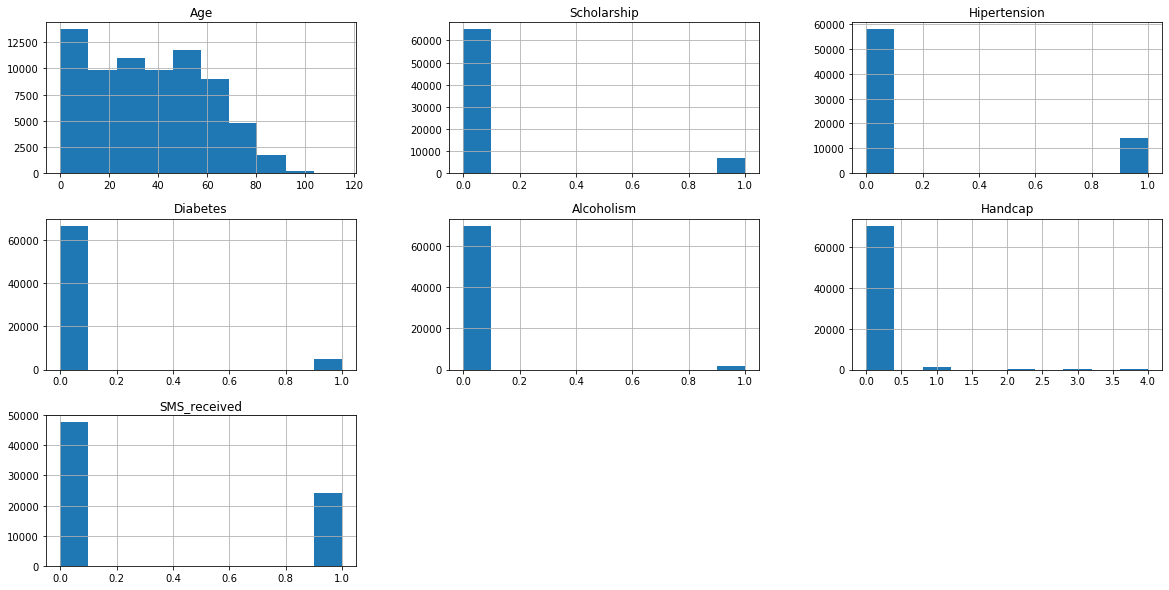

In [130]:
df.hist(figsize=(20,10));

From the first look the age seems to be skewed to the right 
and most patiens does not have Alcoholism ,diabetes,handcap,hipertention
about half of the patiens did not recieve a sms
most of the patiens donot have scholarship

In [131]:
#dividing the dataset into two pices
showed = df.query("No_show =='No'")
not_showed = df.query("No_show == 'Yes'")
showed.count(),not_showed.count()
showed.count().sum(),not_showed.count().sum()

(541530, 176630)

It seems that people who showed up t there appointment are 541530 and who do not showed up are 176630

In [132]:
showed.mean(),not_showed.mean()

/tmp/ipykernel_5530/1240117448.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  showed.mean(),not_showed.mean()


(Age             37.229166
 Scholarship      0.091334
 Hipertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hipertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

Mean Age for the patients who showed up for thier appointment is 37 and for who did not showed up is 34

### Research Question 1 (Do the having a scholarship affect the attendence of patients ..?)

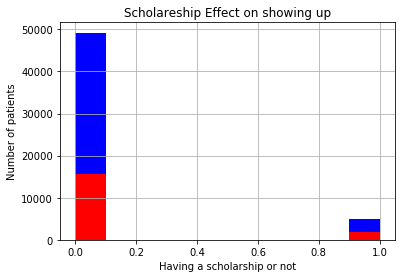

In [133]:
#Scholarship Effect fuction.
def scholarship(df,show,not_show):
    showed.Scholarship.hist(color="blue")
    not_showed.Scholarship.hist(color="red")
    plt.title("Scholareship Effect on showing up")
    plt.ylabel("Number of patients")
    plt.xlabel("Having a scholarship or not");
scholarship(df,showed,not_showed)    

It is very clear that pepole who have a scholarship and showed up is somehow equal to who have a scholarship and did not showed up
and who haven't a scholarsship and did not showed out is about 25% of the patient's who have a scholarship and patients
who have a scholarship and did not come is about 75% of the patients who have a scholarship 

### Research Question 2  (Is Age  very effective in showing up..?)

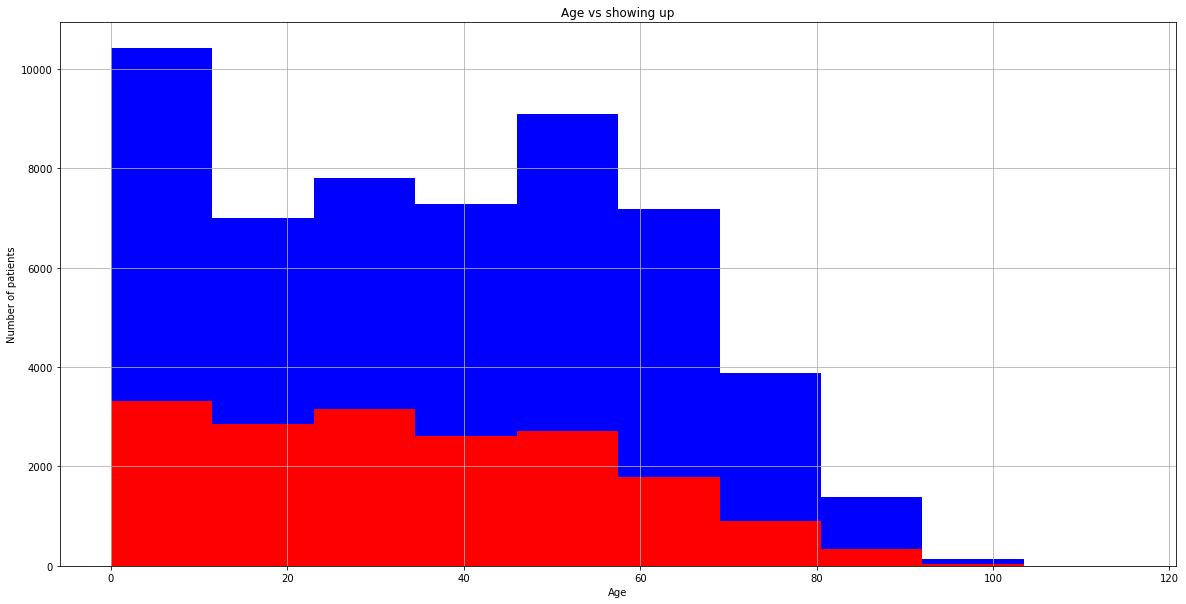

In [134]:
plt.figure(figsize=[20,10])
showed.Age.hist(color='blue',bins=10)
not_showed.Age.hist(color = "red",bins=10)
plt.title("Age vs showing up")
plt.ylabel("Number of patients")
plt.xlabel("Age");

It seems that people who showed up the most are between 0 and 10 years which is likely a childrens came with there parents
people between 45 and 55 years are the most second number to attend the appointment after childrens
most people who do not attend are children too
and second most are teenagers between 15 and 22 years 

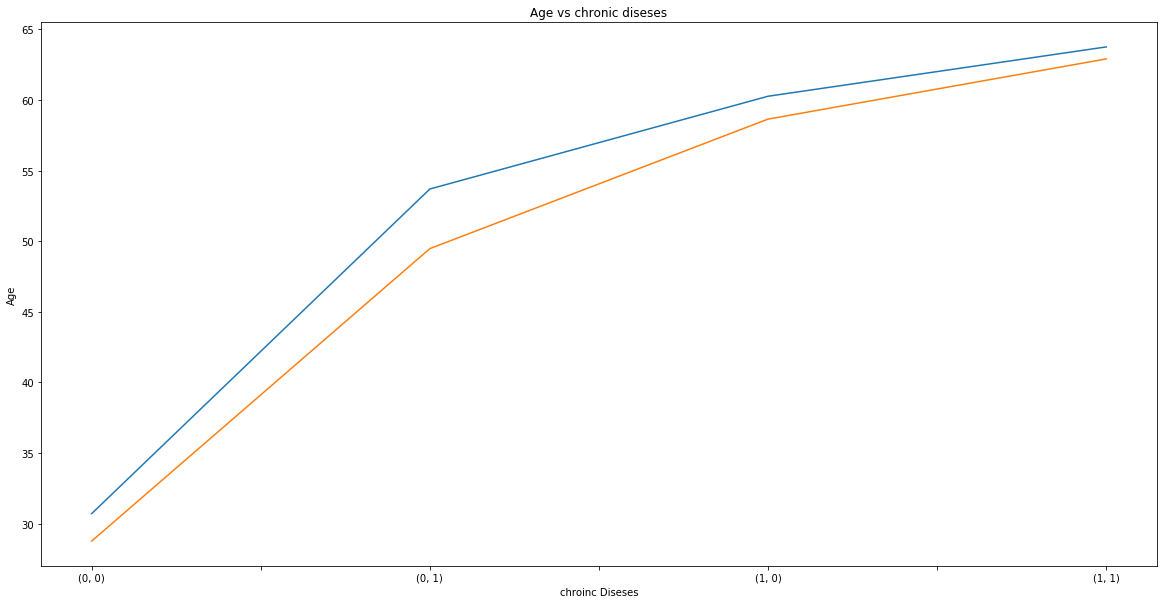

In [135]:
#Does Age and chronic diseses affect showeing up..?
plt.figure(figsize=[20,10])
showed.groupby(["Hipertension","Diabetes"]).mean()["Age"].plot(label="showed")
not_showed.groupby(["Hipertension","Diabetes"]).mean()["Age"].plot(label="noshow")
plt.title("Age vs chronic diseses")
plt.xlabel("chroinc Diseses")
plt.ylabel("Age");

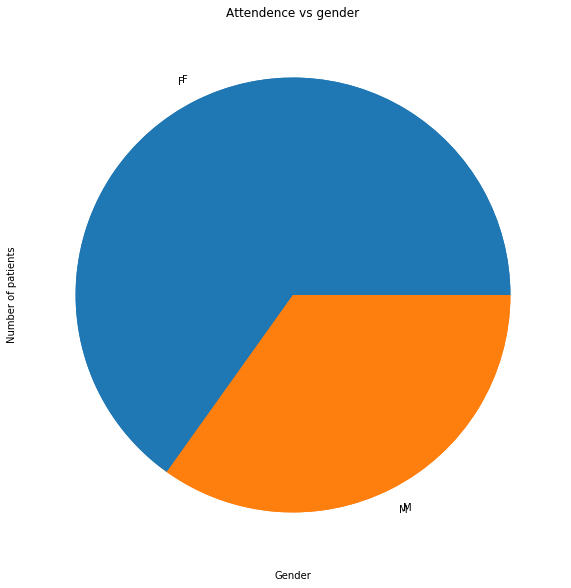

In [136]:
#Gender verses attendence
plt.figure(figsize=([10,10]))
showed.Gender.value_counts(normalize=True).plot(kind="pie",label='show')
not_showed.Gender.value_counts(normalize=True).plot(kind="pie",);
plt.title("Attendence vs gender")
plt.xlabel("Gender")
plt.ylabel("Number of patients");

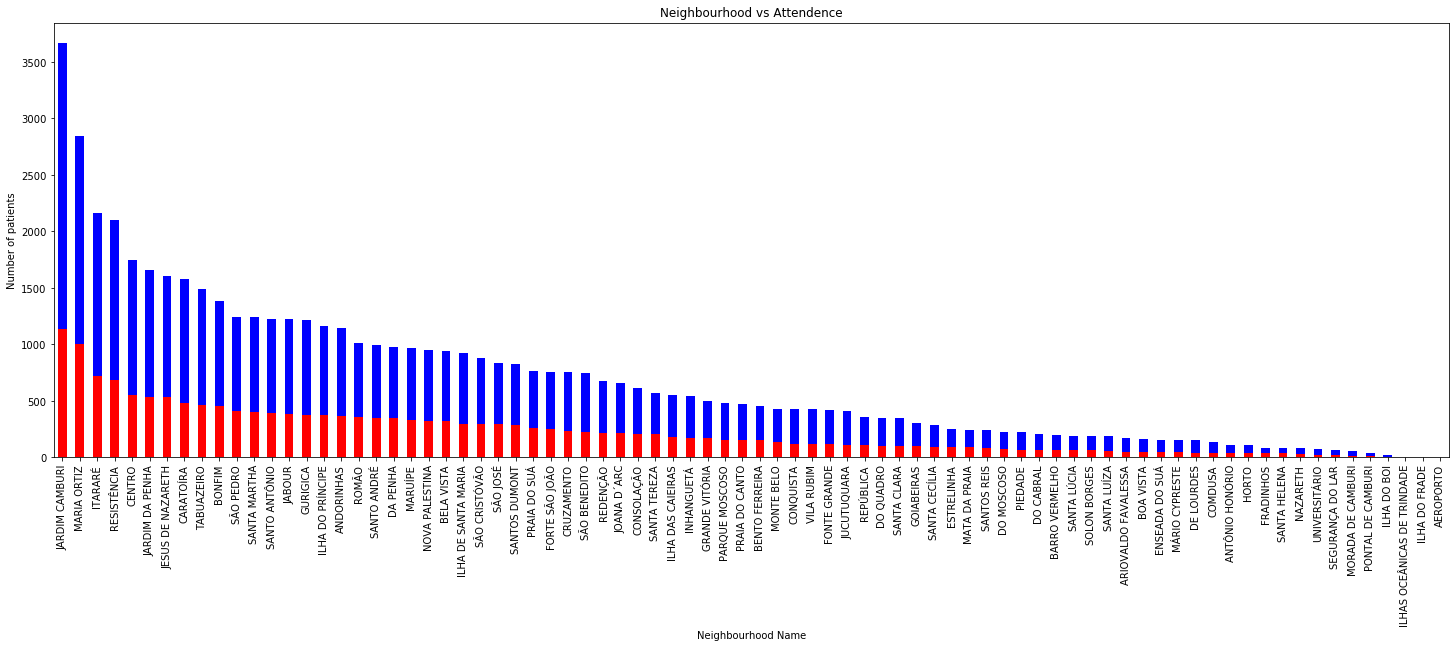

In [137]:
#Neighbourhood verses attendence
plt.figure(figsize=([25,8]))
showed.Neighbourhood.value_counts().plot(kind="bar",label='show',color='blue')
not_showed.Neighbourhood.value_counts().plot(kind="bar",color = "red");
plt.title("Neighbourhood vs Attendence")
plt.xlabel("Neighbourhood Name")
plt.ylabel("Number of patients");

<a id='conclusions'></a>
## Conclusions
It seems that people who showed up the most are between 0 and 10 years which is likely a childrens came with there parents
people between 45 and 55 years are the most second number to attend the appointment after childrens
most people who do not attend are children too
and second most are teenagers between 15 and 22 years 
It is very clear that pepole who have a scholarship and showed up is somehow equal to who have a scholarship and did not showed up
and who haven't a scholarsship and did not showed out is about 25% of the patient's who have a scholarship and patients
who have a scholarship and did not come is about 75% of the patients who have a scholarship 

### Limitations
No clear relation between having ascholarship and attending the appointment


In [138]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

FileNotFoundError: [Errno 2] No such file or directory: 'python'